# Exploratory Data Analysis

Monica Canavan

In this notebook we will be performing EDA on data pertaining to educational attainment, demographics, and technology

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the Data Files

In [44]:
# read in dataset for the EDD employment projections
# using excel format instead of csv.  edd_proj = pd.read_csv('edd_sacr_occproj_2018_2028.csv', sep='\t', encoding = 'utf-16')
edd_proj = pd.read_excel('EDD_SAC_OCCPROJ_2018_2028.xlsx', sheet_name='Occupational')

#read in dataset for the Census PUMA Educational Attainment with Race, Ethnicity and Gender RC
education = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Education')

#read in dataset for the Census Technology Information RC
technology = pd.read_excel('ACSST1Y2019_Technology_RC.xlsx', sheet_name='Technology')

### Begin data review of EDD Occupation Projections

In [45]:
print(edd_proj.shape)

(635, 15)


edd_proj contains 635 rows and 15 columns

In [46]:
#Check first several rows
edd_proj.head()

,SOC Level,SOC Code,Occupational Title,Base Year Employment Estimate 2018,Projected Year Employment Estimate 2028,Numeric Change 2018-2028,Percent-age Change 2018-2028,Exits,Transfers,Total Job Openings,Median Hourly Wages,Median Annual Wages,Entry Level Education,Work Experience,On-the-Job Training
0,1,00-0000,"Total, All Occupations",1080300,1170600,90300,0.083606,493220,791980,1375520,21.99,45730,NaN,NaN,NaN
1,2,11-0000,Management Occupations,68940,74250,5310,0.077023,18830,40730,64870,53.44,111149,NaN,NaN,NaN
2,3,11-1000,Top Executives,18500,19360,860,0.046486,4180,11700,16740,0.00,0,NaN,NaN,NaN
3,4,11-1011,Chief Executives,3610,3260,-350,-0.096953,910,1520,2080,68.24,141937,Bachelor's degree,≥5 years,None
4,4,11-1021,General and Operations Managers,14660,15880,1220,0.083220,3200,10060,14480,51.72,107586,Bachelor's degree,≥5 years,None


In [47]:
#Check the column headings
edd_proj.columns

Index(['SOC Level', 'SOC Code', 'Occupational Title',
       'Base Year Employment Estimate 2018',
       'Projected Year Employment Estimate 2028', 'Numeric Change 2018-2028',
       'Percent-age Change 2018-2028', 'Exits', 'Transfers',
       'Total Job Openings', 'Median Hourly Wages', 'Median Annual Wages',
       'Entry Level Education', 'Work Experience', 'On-the-Job Training'],
      dtype='object')

In [48]:
#Check the datatypes
edd_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SOC Level                                635 non-null    int64  
 1   SOC Code                                 635 non-null    object 
 2   Occupational Title                       635 non-null    object 
 3   Base Year Employment Estimate 2018       635 non-null    int64  
 4   Projected Year Employment Estimate 2028  635 non-null    int64  
 5   Numeric Change 2018-2028                 635 non-null    int64  
 6   Percent-age Change 2018-2028             635 non-null    float64
 7   Exits                                    635 non-null    int64  
 8   Transfers                                635 non-null    int64  
 9   Total Job Openings                       635 non-null    int64  
 10  Median Hourly Wages                      635 non-n

In [49]:
#Evaluate the data for null values
edd_proj.isnull().sum()

SOC Level                                    0
SOC Code                                     0
Occupational Title                           0
Base Year Employment Estimate 2018           0
Projected Year Employment Estimate 2028      0
Numeric Change 2018-2028                     0
Percent-age Change 2018-2028                 0
Exits                                        0
Transfers                                    0
Total Job Openings                           0
Median Hourly Wages                          0
Median Annual Wages                          0
Entry Level Education                      115
Work Experience                            115
On-the-Job Training                        115
dtype: int64

The nulls that exist are not in rows of data we will be including in the analysis an can be ignored.  The exist in SOC Levels 1, 2 and 3.  We will be only concerned with SOC Level 4 which is the level that contains data Entry Level Education

In [50]:
#Count the number of unique entry level education values and view with is the most frequent
edd_proj['Entry Level Education'].describe()


count                                   520
unique                                    8
top       High school diploma or equivalent
freq                                    199
Name: Entry Level Education, dtype: object

In [51]:
#View the counts of each of the entery level education values
edd_proj['Entry Level Education'].value_counts()


High school diploma or equivalent    199
Bachelor's degree                    134
No formal educational credential      66
Associate's degree                    33
Doctoral or professional degree       30
Postsecondary non-degree award        29
Master's degree                       24
Some college, no degree                5
Name: Entry Level Education, dtype: int64

In [52]:
edd_proj['Entry Level Education'].value_counts(normalize=True)


High school diploma or equivalent    0.382692
Bachelor's degree                    0.257692
No formal educational credential     0.126923
Associate's degree                   0.063462
Doctoral or professional degree      0.057692
Postsecondary non-degree award       0.055769
Master's degree                      0.046154
Some college, no degree              0.009615
Name: Entry Level Education, dtype: float64

In [54]:
edd_proj.isnull().sum()

SOC Level                                    0
SOC Code                                     0
Occupational Title                           0
Base Year Employment Estimate 2018           0
Projected Year Employment Estimate 2028      0
Numeric Change 2018-2028                     0
Percent-age Change 2018-2028                 0
Exits                                        0
Transfers                                    0
Total Job Openings                           0
Median Hourly Wages                          0
Median Annual Wages                          0
Entry Level Education                      115
Work Experience                            115
On-the-Job Training                        115
dtype: int64

In [72]:
#Summary of categorial values
edd_proj.describe(include=object)

,SOC Code,Occupational Title,Entry Level Education,Work Experience,On-the-Job Training
count,635,635,520,520,520
unique,635,635,8,3,6
top,13-2061,Marketing Managers,High school diploma or equivalent,None,None
freq,1,1,199,445,227


In [55]:
#Create a DF for SOC Level 4
edd_proj_4 = edd_proj[edd_proj['SOC Level'] == 4].copy()
edd_proj_4.shape

(520, 15)

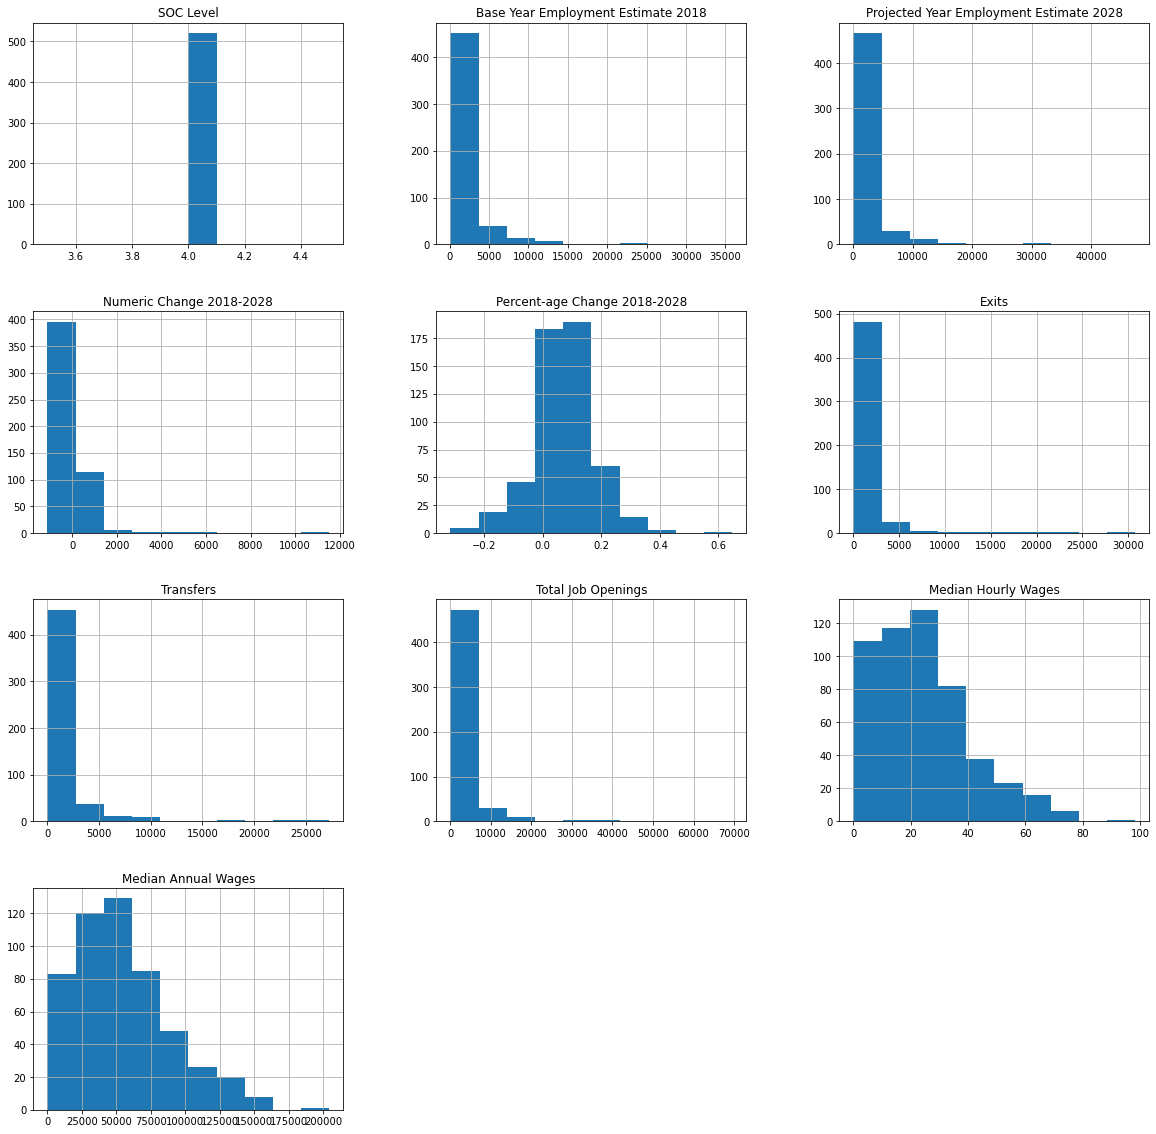

In [56]:
#Plot Histograms for SOC Level 4
edd_proj_4.hist(figsize=(20,20));

### Begin Data review of Educational Attainment with Gender, Race and Ethnicity


In [57]:
print(education.shape)

(90, 6)


In [58]:
#Check first several rows
education.head()

,Race,Ethnicity,Educational attainment,Total,Male,Female
0,White,Not Hispanic,Less Than HS,2288,1212,1076
1,White,Not Hispanic,HS or GED,9339,4588,4751
2,White,Not Hispanic,Some college and AA,16757,7939,8818
3,White,Not Hispanic,BA,9102,4691,4411
4,White,Not Hispanic,Graduate School,4493,2467,2026


In [59]:
#Check the column headings
education.columns

Index(['Race', 'Ethnicity', 'Educational attainment', 'Total', 'Male',
       'Female'],
      dtype='object')

In [60]:
#Check the datatypes
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Race                    90 non-null     object
 1   Ethnicity               90 non-null     object
 2   Educational attainment  90 non-null     object
 3   Total                   90 non-null     int64 
 4   Male                    90 non-null     int64 
 5   Female                  90 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [61]:
#Evaluate the data for null values
education.isnull().sum()

Race                      0
Ethnicity                 0
Educational attainment    0
Total                     0
Male                      0
Female                    0
dtype: int64

No nulls in the dataset

In [62]:
#Statistical Summary
education.describe()

,Total,Male,Female
count,90.000000,90.000000,90.000000
mean,854.244444,416.277778,437.966667
std,2314.122545,1123.575703,1195.785666
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,59.500000,21.000000,34.500000
75%,644.000000,303.750000,347.250000
max,16757.000000,7939.000000,8818.000000


<AxesSubplot:xlabel='Female', ylabel='Educational attainment'>

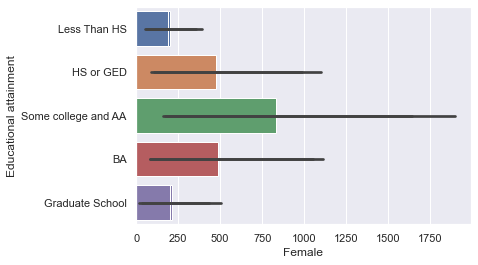

In [97]:
# set the background style of the plot
sns.set_style('darkgrid')

# plot the graph using the default estimator mean
sns.barplot(x ='Male', y ='Educational attainment', data = education)


<AxesSubplot:xlabel='Female', ylabel='Educational attainment'>

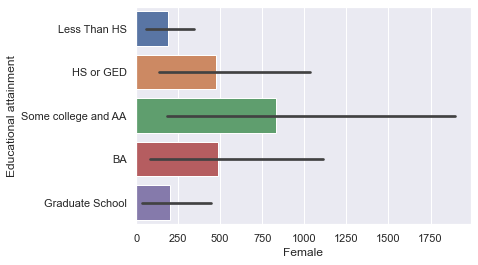

In [128]:
sns.barplot(x ='Female', y ='Educational attainment', data = education)

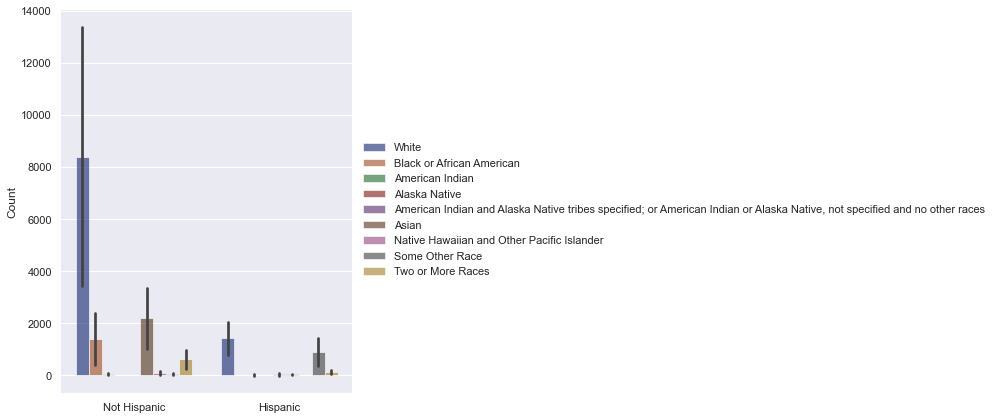

In [110]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=education, kind="bar",
    x="Ethnicity", y="Total", hue="Race",
    ci="sd", palette="dark", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

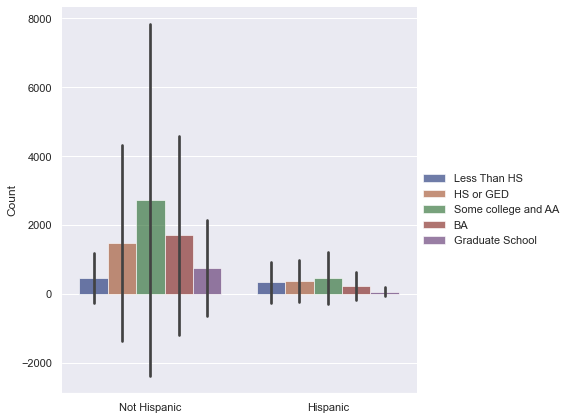

In [117]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=education, kind="bar",
    x="Ethnicity", y="Total", hue="Educational attainment",
    ci="sd", palette="dark", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

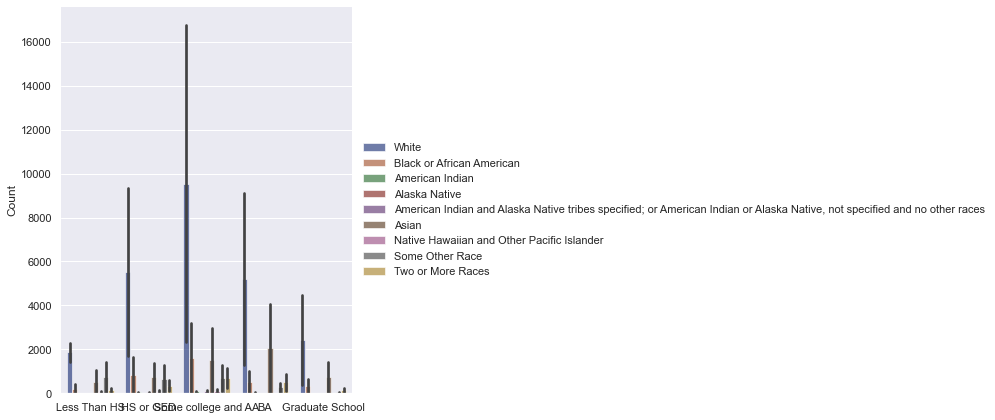

In [125]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=education, kind="bar",
    x="Educational attainment", y="Total", hue="Race",
    ci="sd", palette="dark", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

Educational attainment
BA                     AxesSubplot(0.125,0.125;0.775x0.755)
Graduate School        AxesSubplot(0.125,0.125;0.775x0.755)
HS or GED              AxesSubplot(0.125,0.125;0.775x0.755)
Less Than HS           AxesSubplot(0.125,0.125;0.775x0.755)
Some college and AA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

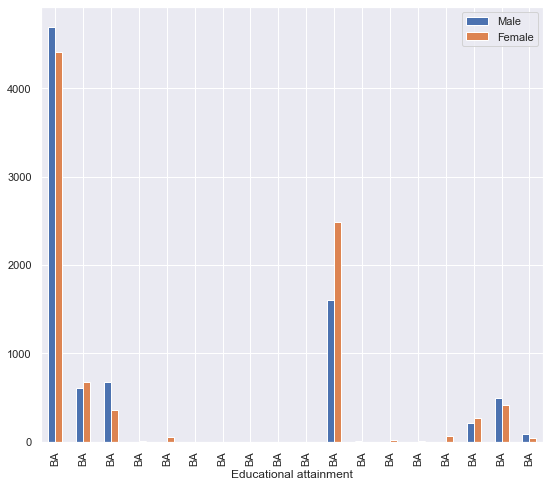

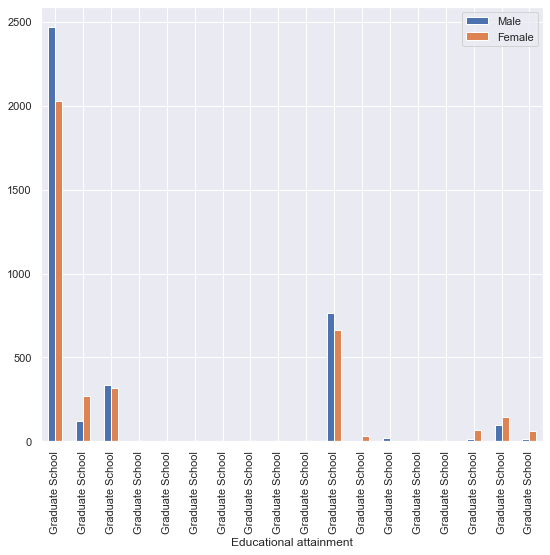

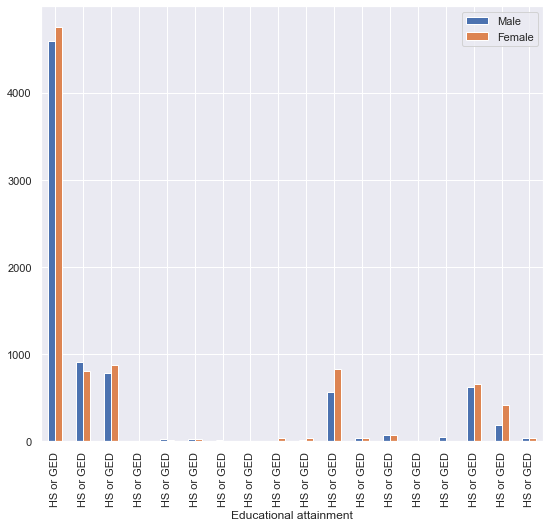

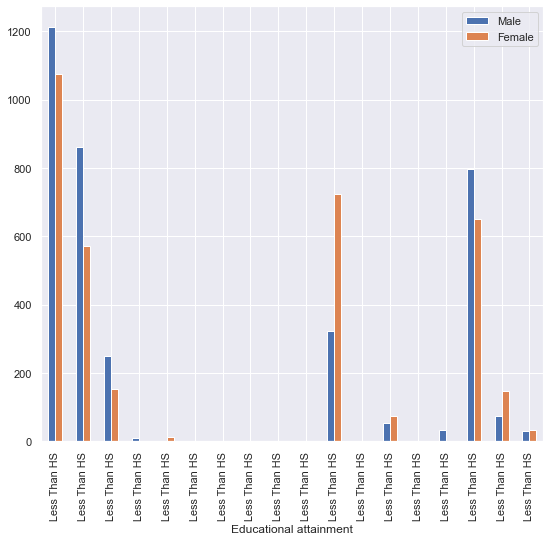

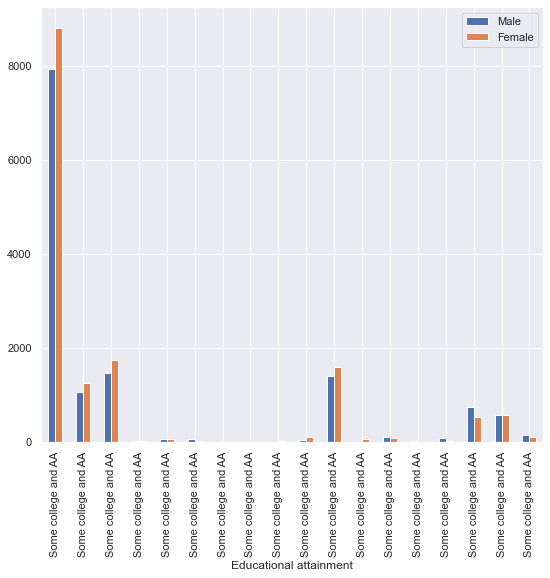

In [138]:
education.groupby("Educational attainment").plot(x="Educational attainment", y=["Male", "Female"], kind="bar",figsize=(9,8))

Educational attainment
BA                     AxesSubplot(0.125,0.125;0.775x0.755)
Graduate School        AxesSubplot(0.125,0.125;0.775x0.755)
HS or GED              AxesSubplot(0.125,0.125;0.775x0.755)
Less Than HS           AxesSubplot(0.125,0.125;0.775x0.755)
Some college and AA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

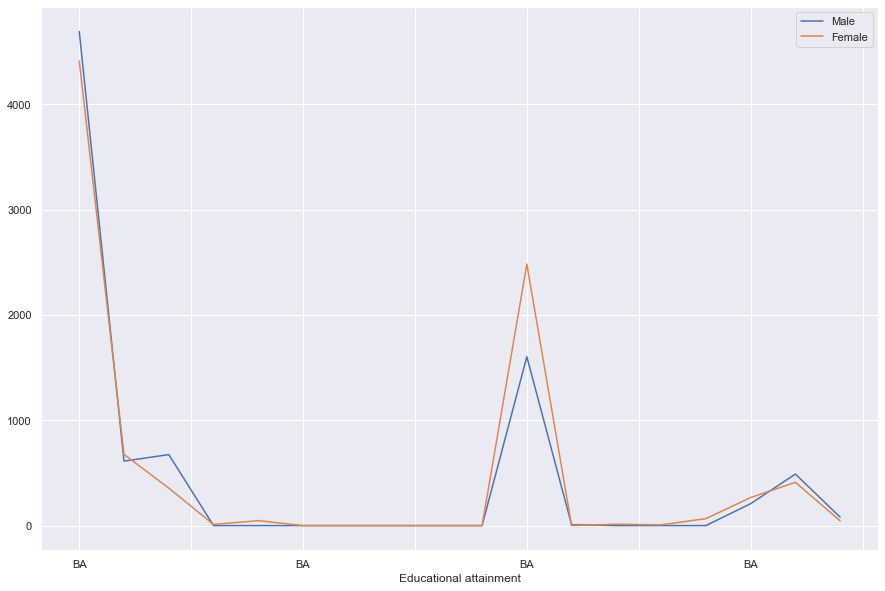

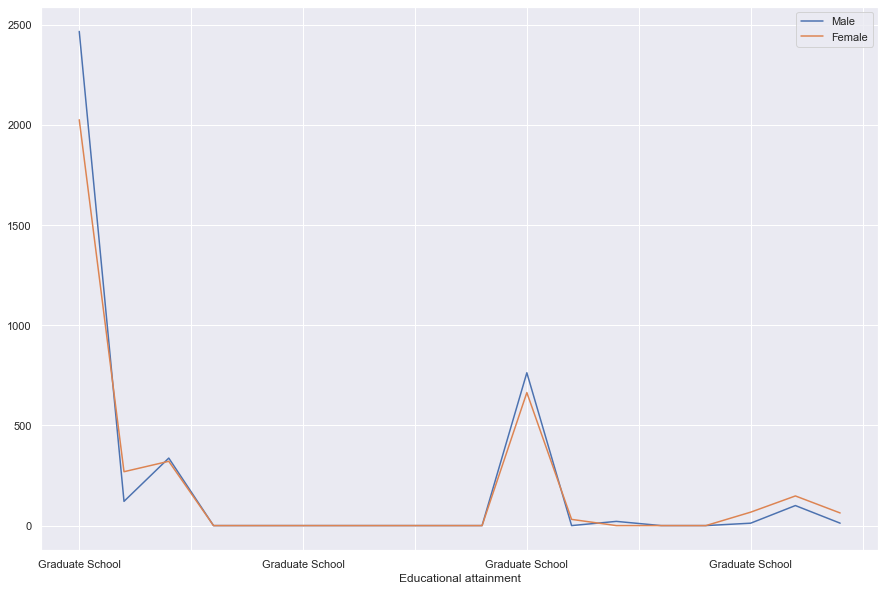

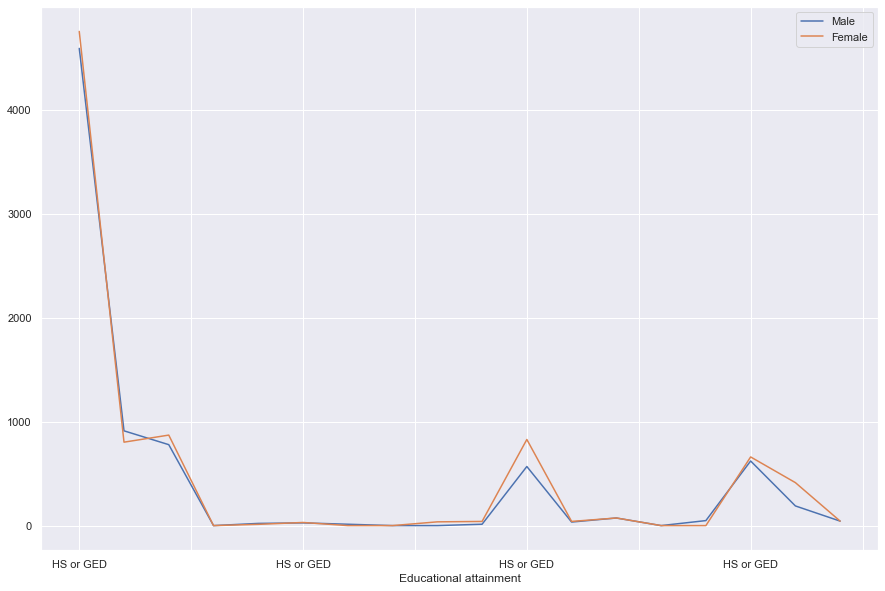

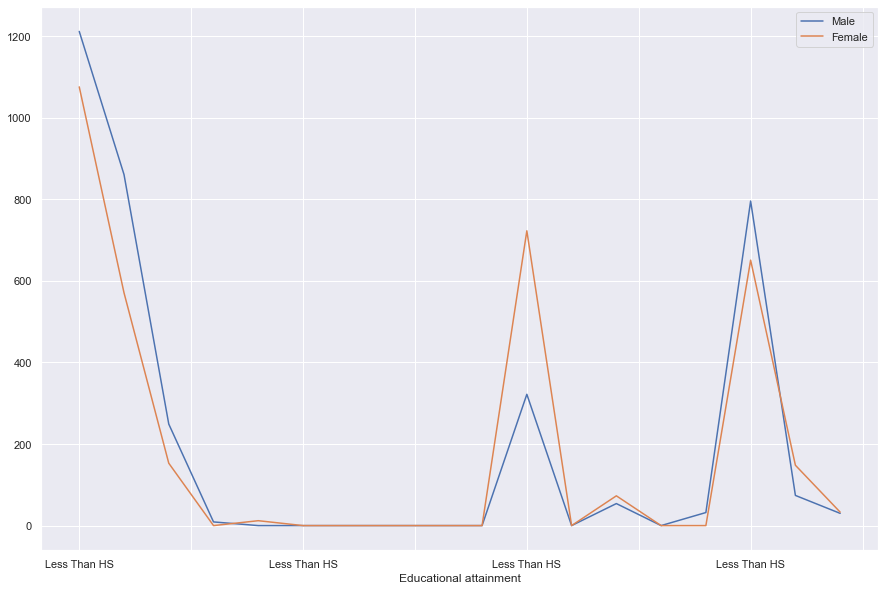

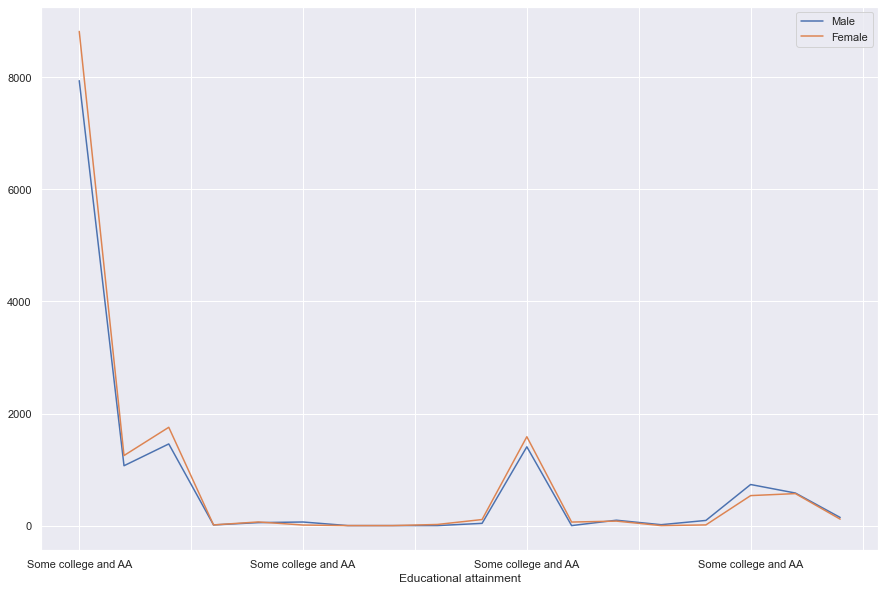

In [151]:
#df1=df[:5]
#df1.plot('Country',['Corruption','Freedom','Generosity','Social support'],kind = 'line')
education.groupby('Educational attainment').plot('Educational attainment', ['Male', 'Female'], kind = 'line',figsize=(15,10))

### Begin Data review of Technology Resources

In [95]:
print(technology.shape)

(34, 3)


In [64]:
#Check first several rows
technology.head()

,Label,Total Estimate,Percent Estimate
0,Total households,"40,662",(X)
1,TYPES OF COMPUTER,NaN,NaN
2,Has one or more types of computing devices:,"39,135",96.2%
3,Desktop or laptop,"33,599",82.6%
4,Desktop or laptop with no other type of comput...,"1,209",3.0%


In [65]:
#Check the column headings
technology.columns

Index(['Label', 'Total Estimate', 'Percent Estimate'], dtype='object')

In [66]:
#Check the datatypes
technology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             34 non-null     object
 1   Total Estimate    31 non-null     object
 2   Percent Estimate  31 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [67]:
#Evaluate the data for null values
technology.isnull().sum()

Label               0
Total Estimate      3
Percent Estimate    3
dtype: int64